In [1]:
import numpy as np
import pandas as pd
from pylab import mpl, plt
%matplotlib inline
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (10, 6)

from scipy.ndimage import gaussian_gradient_magnitude

from nltk import ngrams
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize

import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_sm')

from wordcloud import ImageColorGenerator, WordCloud

from collections import Counter
import re
from string import punctuation

from PIL import Image

# Create a text file called .env in the current working directory
# place the following text inside the file
# NEWSAPI_API_KEY=your-newsapi-api-key

from dotenv import find_dotenv, get_key
api_key = get_key(find_dotenv(), 'NEWSAPI_API_KEY')

# NewsAPI
#   https://newsapi.org
# NewsAPI Python client
#   https://github.com/mattlisiv/newsapi-python
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

---

In [2]:
status, total_results, articles = newsapi.get_everything(
    q='bitcoin',
    sort_by='relevancy',
    language='en',
    page_size=100,
    page=1,
).values()

sentiments = []
for article in articles:
    try:
        text = article['content']
        results = analyzer.polarity_scores(text)
        compound = results['compound']
        pos = results['pos']
        neu = results['neu']
        neg = results['neg']
        sentiments.append({
            'text': text,
            'Compound': compound,
            'Positive': pos,
            'Negative': neg,
            'Neutral': neu,
        })
    except AttributeError:
        pass
    
btc = pd.DataFrame(sentiments)

btc.describe().style.background_gradient(axis=1)

,Compound,Positive,Negative,Neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.060162,0.046060,0.028850,0.925090
std,0.345895,0.063719,0.042750,0.072354
min,-0.599400,0.000000,0.000000,0.718000
25%,-0.081925,0.000000,0.000000,0.871000
50%,0.000000,0.000000,0.000000,0.930000
75%,0.323650,0.083250,0.062250,1.000000
max,0.840200,0.282000,0.153000,1.000000


In [3]:
status, total_results, articles = newsapi.get_everything(
    q='ethereum',
    sort_by='relevancy',
    language='en',
    page_size=100,
    page=1,
).values()

sentiments = []
for article in articles:
    try:
        text = article['content']
        results = analyzer.polarity_scores(text)
        compound = results['compound']
        pos = results['pos']
        neu = results['neu']
        neg = results['neg']
        sentiments.append({
            'text': text,
            'Compound': compound,
            'Positive': pos,
            'Negative': neg,
            'Neutral': neu,
        })
    except AttributeError:
        pass
    
eth = pd.DataFrame(sentiments)

eth.describe().style.background_gradient(axis=1)

,Compound,Positive,Negative,Neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.154368,0.058590,0.020930,0.920500
std,0.350256,0.071132,0.035151,0.075321
min,-0.571900,0.000000,0.000000,0.655000
25%,0.000000,0.000000,0.000000,0.881250
50%,0.051350,0.041000,0.000000,0.927000
75%,0.411525,0.097250,0.048000,1.000000
max,0.858100,0.290000,0.151000,1.000000


In [4]:
sw = stopwords.words('english')
sw = sw + ['u', 'it', '\'s', 'n\'t', '…', '\`', '``', 'char', 'chars', '\'\'']
sw = set(sw)
sw

{"''",
 "'s",
 '\\`',
 '``',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'char',
 'chars',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 "n't",
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'o

In [5]:
lemmatizer = WordNetLemmatizer()
def tokenizer (text):
    words = word_tokenize(text)
    words = list(filter(lambda w: w.lower(), words))
    words = list(filter(lambda t: t not in punctuation, words))
    words = list(filter(lambda t: t.lower() not in sw, words))
    tokens = [lemmatizer.lemmatize(word) for word in words]
    return tokens

In [6]:
btc['tokens'] = btc.text.apply(tokenizer)
btc.head()

,text,Compound,Positive,Negative,Neutral,tokens
0,El Salvador's President Nayib Bukele has made ...,0.8402,0.282,0.0,0.718,"[El, Salvador, President, Nayib, Bukele, made,..."
1,El Salvador has become the first country in th...,0.1280,0.043,0.0,0.957,"[El, Salvador, become, first, country, world, ..."
2,"It's all about clean energy, it seems. \r\nElo...",0.6908,0.169,0.0,0.831,"[clean, energy, seems, Elon, Musk, Tesla, caus..."
3,image captionThe move means bitcoin will be ac...,0.2732,0.060,0.0,0.940,"[image, captionThe, move, mean, bitcoin, accep..."
4,"Several crypto fans that descended on Miami, F...",0.5574,0.107,0.0,0.893,"[Several, crypto, fan, descended, Miami, Flori..."


In [7]:
eth['tokens'] = eth.text.apply(tokenizer)
eth.head()

,text,Compound,Positive,Negative,Neutral,tokens
0,TL;DR: The Cryptocurrency with Ethereum and So...,0.0000,0.000,0.000,1.000,"[TL, DR, Cryptocurrency, Ethereum, Solidity, B..."
1,It wasn't long ago that your average person ha...,-0.2960,0.000,0.061,0.939,"[long, ago, average, person, clue, NFT, Nowada..."
2,This article was translated from our Spanish e...,-0.3400,0.000,0.066,0.934,"[article, translated, Spanish, edition, using,..."
3,This new mining feature is called 'Norton Cryp...,0.0000,0.000,0.000,1.000,"[new, mining, feature, called, 'Norton, Crypto..."
4,CryptoPunks represent the only historically re...,-0.4588,0.067,0.151,0.782,"[CryptoPunks, represent, historically, relevan..."


In [8]:
N = 2
grams = ngrams(tokenizer(btc.text.str.cat()), N)
Counter(grams).most_common(20)

[(('Reuters', 'Bitcoin'), 19),
 (('El', 'Salvador'), 17),
 (('Reuters', 'Staff'), 16),
 (('Bitcoin', 'world'), 13),
 (('previous', 'close'), 12),
 (('close', 'Bitcoin'), 12),
 (('world', 'biggest'), 12),
 (('biggest', 'best-known'), 12),
 (('21', 'Reuters'), 12),
 (('legal', 'tender'), 11),
 (('bitcoin', 'legal'), 11),
 (('best-known', 'cryptocurrency'), 11),
 (('June', '21'), 11),
 (('taken', 'June'), 10),
 (('Elon', 'Musk'), 9),
 (('illustration', 'taken'), 9),
 (('2021', 'REUTERS/Edgar'), 9),
 (('President', 'Nayib'), 7),
 (('Reuters', 'El'), 7),
 (('Bitcoin', 'cryptocurrency'), 7)]

In [9]:
grams = ngrams(tokenizer(eth.text.str.cat()), N)
Counter(grams).most_common(20)

[(('Reuters', 'Bitcoin'), 15),
 (('previous', 'close'), 12),
 (('close', 'Bitcoin'), 12),
 (('Bitcoin', 'world'), 12),
 (('world', 'biggest'), 12),
 (('biggest', 'best-known'), 12),
 (('taken', 'June'), 12),
 (('best-known', 'cryptocurrency'), 11),
 (('Reuters', 'Staff'), 11),
 (('illustration', 'taken'), 9),
 (('World', 'Wide'), 7),
 (('Wide', 'Web'), 7),
 (('digital', 'asset'), 7),
 (('seen', 'illustration'), 7),
 (('illustration', 'picture'), 7),
 (('representation', 'virtual'), 7),
 (('non-fungible', 'token'), 6),
 (('Bitcoin', 'dropped'), 6),
 (('2021', 'REUTERS/Edgar'), 6),
 (('picture', 'taken'), 6)]

In [10]:
def token_count (tokens, N=3):
    return Counter(tokens).most_common(N)
all_tokens = tokenizer(btc.text.str.cat())
token_count(all_tokens, 10)

[('Bitcoin', 79),
 ('Reuters', 59),
 ('June', 45),
 ('bitcoin', 35),
 ('cryptocurrency', 34),
 ('El', 26),
 ('world', 20),
 ('2021', 20),
 ('seen', 20),
 ('Salvador', 19)]

In [11]:
all_tokens = tokenizer(eth.text.str.cat())
token_count(all_tokens, 10)

[('Bitcoin', 51),
 ('Reuters', 35),
 ('June', 31),
 ('cryptocurrency', 28),
 ('2021', 20),
 ('Ethereum', 18),
 ('seen', 17),
 ('cryptocurrencies', 17),
 ('world', 16),
 ('illustration', 16)]

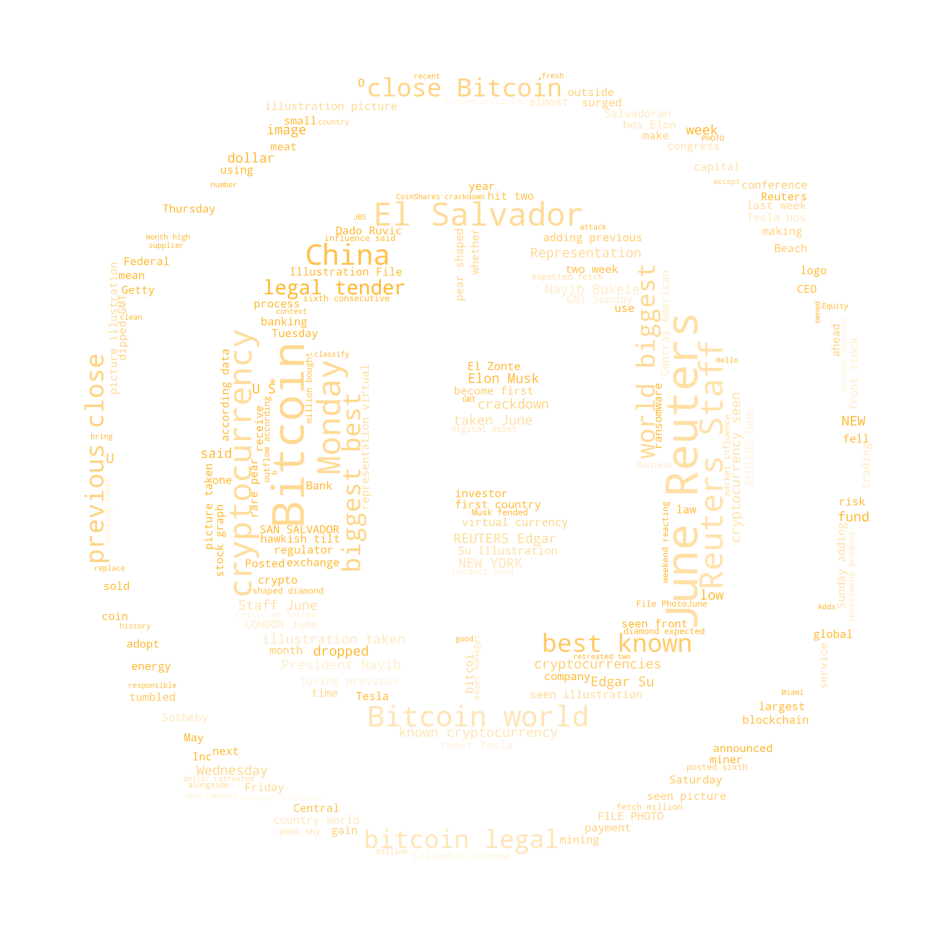

In [12]:
bitcoin_color = np.array(Image.open('bitcoin_PNG7.png'))
#bitcoin_color = bitcoin_color[::3, ::3]
bitcoin_mask = bitcoin_color.copy()
bitcoin_mask[bitcoin_mask.sum(axis=2) == 0] = 255
edges = np.mean([gaussian_gradient_magnitude(bitcoin_color[:, :, i] / 255., 2) for i in range(3)], axis=0)
bitcoin_mask[edges > .08] = 255

wc = WordCloud(mask=bitcoin_mask,
               relative_scaling=0,
               background_color='white').generate(' '.join(tokenizer(btc.text.str.cat())))

image_colors = ImageColorGenerator(bitcoin_color)
wc.recolor(color_func=image_colors)
plt.figure(dpi=200)
plt.imshow(wc)
plt.axis('off');

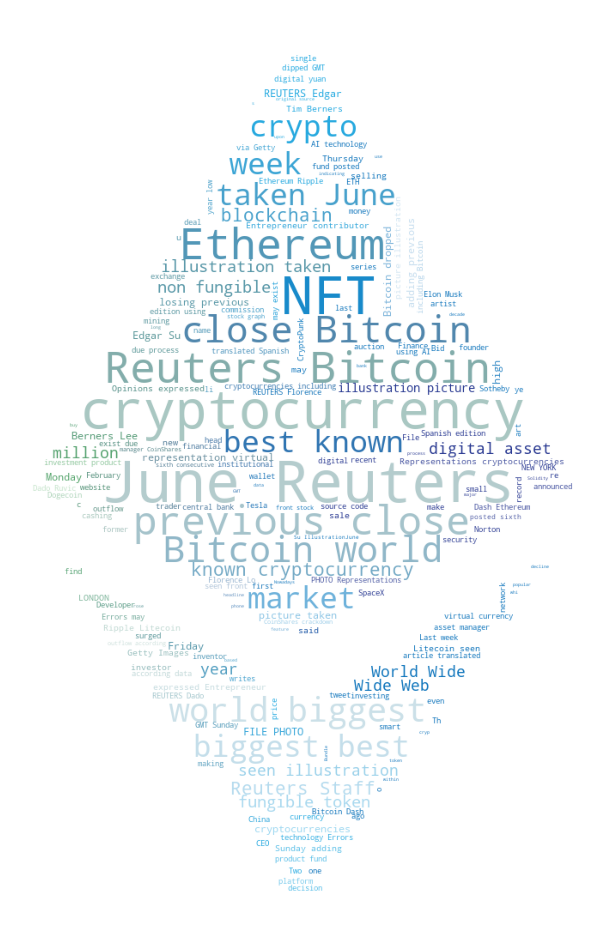

In [13]:
eth_color = np.array(Image.open('ethereum.png'))
#eth_color = eth_color[::3, ::3]
eth_mask = eth_color.copy()
eth_mask[eth_mask.sum(axis=2) == 0] = 255
edges = np.mean([gaussian_gradient_magnitude(eth_color[:, :, i] / 255., 2) for i in range(3)], axis=0)
eth_mask[edges > .08] = 255

wc = WordCloud(mask=eth_mask,
               relative_scaling=0,
               background_color='white').generate(' '.join(tokenizer(eth.text.str.cat())))

image_colors = ImageColorGenerator(eth_color)
wc.recolor(color_func=image_colors)
plt.figure(dpi=200)
plt.imshow(wc)
plt.axis('off');

In [14]:
def wordcloud (text, title=''):
    df_cloud = WordCloud(width=500, colormap='RdYlBu', background_color='white').generate(text)
    plt.imshow(df_cloud);
    plt.axis('off');
    plt.title(title, fontdict={'fontsize': 48, 'fontweight': 'bold'});

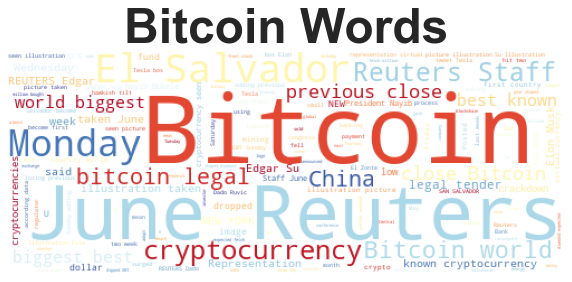

In [15]:
wordcloud(' '.join(tokenizer(btc.text.str.cat())), title='Bitcoin Words')

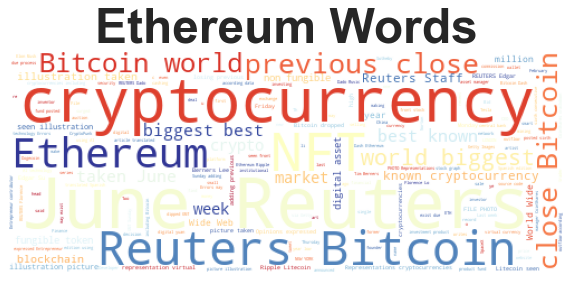

In [16]:
wordcloud(' '.join(tokenizer(eth.text.str.cat())), title='Ethereum Words')

In [17]:
all_btc_text = btc.text.str.cat()
doc = nlp(all_btc_text)
doc.user_data['title'] = 'Bitcoin NER'
displacy.render(doc, style='ent', jupyter=True)

In [18]:
for ent in doc.ents:
    print(ent.text, ent.label_)

El Salvador's GPE
Nayib Bukele PERSON
Central American NORP
Salvador ORG
first ORDINAL
Nayib Bukele PERSON
Wednesday DATE
Citizens ORG
Elon Musk PERSON
Tesla PERSON
the past few months DATE
first ORDINAL
Tesla ORG
$1.5 billion MONEY
US GPE
El Salvador GPE
first ORDINAL
Bitcoin PERSON
Miami GPE
Florida GPE
last weekend DATE
covid-19 PERSON
Larry Cermak PERSON
Last week DATE
Disney ORG
This week DATE
Tec PERSON
Mary-Ann RussonBusiness PERSON
BBC News ORG
US GPE
Donald Trump PERSON
Fox Business ORG
Bitcoin PERSON
US GPE
SALVADOR ORG
June 16 DATE
Reuters ORG
El Salvador GPE
U.S. GPE
Finance ORG
Alejandro Zelaya PERSON
Wednesday DATE
Central American NORP
June 23 DATE
Reuters ORG
El Salvador GPE
Pr PERSON
June 23 DATE
Reuters ORG
El Salvador GPE
Bitcoin PERSON
May 20, 2021 DATE
Reuters ORG
Reuters ORG
El Salvador GPE
U.S. GPE
Finance ORG
Alejandro Zelaya PERSON
Wednesday DATE
the Central American LOC
Colonial Pipeline ORG
JBS ORG
up to one quarter DATE
US GPE
Late last week DATE
Monday DATE

In [19]:
all_eth_text = eth.text.str.cat()
doc = nlp(all_eth_text)
doc.user_data['title'] = 'Ethereum NER'
displacy.render(doc, style='ent', jupyter=True)

In [20]:
for ent in doc.ents:
    print(ent.text, ent.label_)

21.25 MONEY
June 17 DATE
97% PERCENT
NFT ORG
hundreds of thousands CARDINAL
Spanish NORP
AI ORG
Last May DATE
Buterin PERSON
27 CARDINAL
tomorrow DATE
Norton ORG
Norton ORG
Norton Crypto PERSON
decades DATE
Ill PERSON
Jacks ORG
Tim Berners-Lee PERSON
NFT ORG
Sotheby's ORG
NFT ORG
Ethereum ORG
Keep Network ORG
Last week DATE
NFT ORG
as much as CARDINAL
90 percent PERCENT
recent weeks DATE
recent months DATE
Qian PERSON
China GPE
Sina Finance ORG
Monday DATE
Costfoto PERSON
Barcroft Media PERSON
Getty Images ORG
Yao Qian PERSON
China GPE
8.54 % PERCENT
36,265 MONEY
Wednesday DATE
2,853.31 MONEY
Bitcoin PERSON
30.8% PERCENT
year DATE
27,734 MONEY
Jan. DATE
5.71% PERCENT
35,210 MONEY
0600 CARDINAL
GMT ORG
Saturday DATE
2,131.11 MONEY
Bitcoin PERSON
45.7% PERCENT
2021 DATE
6 MONEY
Getty Images
Investors ORG
the third week DATE
February 2018 DATE
9.83 % PERCENT
22:05 CARDINAL
GMT ORG
Sunday DATE
3,492.71 MONEY
Bitcoin PERSON
40.7% PERCENT
year DATE
27 MONEY
Reuters ORG
June 25 DATE
Reuters O

---